### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
# Import library yang akan digunakan
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Pilih lokasi folder dimana dataset berada
path_data = '/content/gdrive/My Drive/Colab Notebooks/'

# Buka file csv yang akan dibaca
dataset = pd.read_csv(path_data + 'online_retail_II.csv')

# Tampilkan dataset
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### Create New Feature: Year

In [ ]:
# Ubah tipe data kolom InvoiceDate menjadi tipe ‘datetime’
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

# Gunakan function dari library pandas untuk mendapatkan tahun dari kolom InvoiceDate
dataset['Year'] = pd.DatetimeIndex(dataset['InvoiceDate']).year
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Filtering Data

In [ ]:
# Quantity minimal 1 (tidak boleh 0 dan minus)
quantity = dataset[(dataset['Quantity'] >= 1)]
quantity

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


In [ ]:
# Kolom Invoice tidak mengandung huruf ‘C’ 
invoice = dataset[dataset['Invoice'].str.contains('C') == False]
invoice

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


In [ ]:
# Kedua Syarat yaitu Quantity minimal 1 dan Invoice tidak mengandung huruf c
filter = dataset[(dataset['Quantity'] >= 1) & (dataset['Invoice'].str.contains('C') == False)]
filter

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [ ]:
# Buat kolom baru bernama Revenue dengan nilai Quantity dikali dengan Price
dataset['Revenue'] = dataset['Quantity'] * dataset['Price']
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [ ]:
# Hitung rata-rata Revenue per tahun. Lalu buatlah visualisasinya
revenue_mean = dataset.groupby(by=['Year']).mean()['Revenue'].reset_index()
revenue_mean

,Year,Revenue
0,2009,17.684777
1,2010,18.152555
2,2011,18.018195


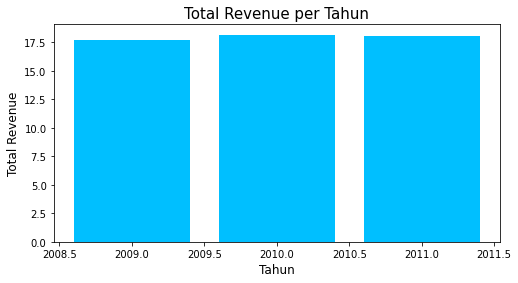

In [ ]:
# Visualisasi Revenue per Tahun
import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(figsize=(8,4))
plt.bar(revenue_mean['Year'], revenue_mean['Revenue'], color='deepskyblue')

plt.title('Total Revenue per Tahun', size=15)
plt.ylabel('Total Revenue', size=12)
plt.xlabel('Tahun', size=12)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

### Interpretation

Total Revenue pada tahun 2009 lebih rendang dibandingkan dengan total revenue di tahun 2010 dan 2011. Sementara tahun 2010 menyumbang nilai revenue tertinggi. Terjadi kenaikan total revenue pada tahun 2010 sebanyak 2.5% jika dibandingkan dengan tahun 2009. Hal tersebut dikarenakan banyaknya produk baru yang bermunculan sehinga membuat pelanggan tertarik ingin mencoba produk yang baru. Jika dibandingkan dengan tahun 2010, total revenue pada tahun 2011 ternyata mengalami penurunan sebesar 0.74% dari revenue tahun 2010 dikarenakan produk baru yang dikeluarkan pada tahun 2010 tidak berinovasi sehingga membuat pelanggan bosan karena sudah pernah mencoba produk tersebut. Sebaiknya untuk tahun depan, perusahaan memunculkan produk baru atau melakukan inovasi pada produk yang telah ada sehingga dapat menarik perhatian pembeli untuk mencoba dan membeli produk tersebut.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
# Lakukan filtering menggunakan data sales (data yang sudah di filter pada section 1) dengan ketentuan CustomerID tidak boleh kosong atau null.
finished = filter[filter['Customer ID'].notnull() | filter['Customer ID'] != '']
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


#### Customers who canceled their purchases

In [ ]:
# mengelompokkan pelanggan yang membatalkan belanjanya
cancel = dataset[dataset['Invoice'].str.contains('C') == True]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.40
...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,-224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,-54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,-1.25


In [ ]:
# Dikelompokkan Groupby Customer ID untuk melihat jumlah pembatalan
cancel.groupby("Customer ID").count()[["Invoice", "Quantity"]]

,Invoice,Quantity
Customer ID,,
12346.0,14,14
12349.0,5,5
12352.0,10,10
12359.0,10,10
12360.0,1,1
...,...,...
18280.0,2,2
18282.0,1,1
18284.0,1,1


### Number of Finished and Canceled Transactions Each Year

In [ ]:
# Transaksi Berhasil
berhasil = finished.groupby("Year").count()['Invoice'].reset_index()
berhasil

,Year,Invoice
0,2009,44123
1,2010,510694
2,2011,489603


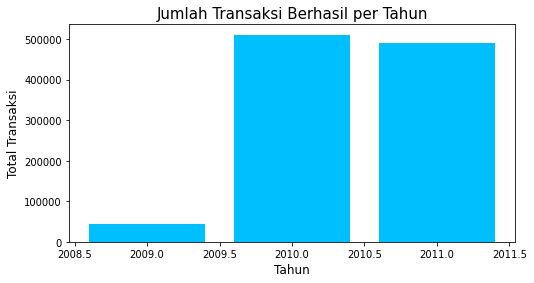

In [ ]:
# Visualisasi Transaksi Berhasil
plt.figure(figsize=(8,4))
plt.bar(berhasil['Year'], berhasil['Invoice'], color='deepskyblue')

plt.title('Jumlah Transaksi Berhasil per Tahun', size=15)
plt.ylabel('Total Transaksi', size=12)
plt.xlabel('Tahun', size=12)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

In [ ]:
# Transaksi Batal
batal = cancel.groupby("Year").count()['Invoice'].reset_index()
batal

,Year,Invoice
0,2009,1015
1,2010,9919
2,2011,8560


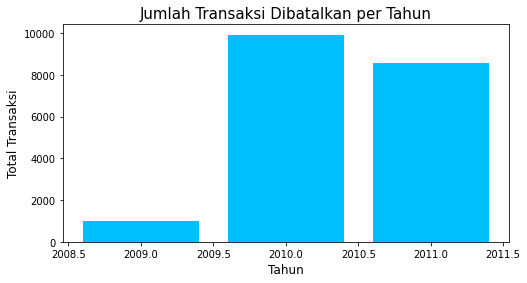

In [ ]:
# Visualisasi Transaksi Dibatalkan
plt.figure(figsize=(8,4))
plt.bar(batal['Year'], batal['Invoice'], color='deepskyblue')

plt.title('Jumlah Transaksi Dibatalkan per Tahun', size=15)
plt.ylabel('Total Transaksi', size=12)
plt.xlabel('Tahun', size=12)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

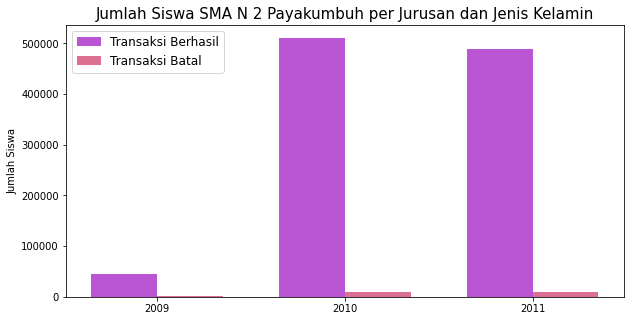

In [ ]:
# Grafik Keduanya
import numpy as np
x = np.arange(len(berhasil['Year']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

mhsa = ax.bar(x - width/2, berhasil['Invoice'], width, label='Transaksi Berhasil', color='mediumorchid')
mhsi = ax.bar(x + width/2, batal['Invoice'], width, label='Transaksi Batal', color='palevioletred')

ax.set_title('Jumlah Siswa SMA N 2 Payakumbuh per Jurusan dan Jenis Kelamin', size=15)
ax.set_ylabel('Jumlah Siswa', size=10)
ax.set_xticks(x)
ax.set_xticklabels(berhasil['Year'], size=10)
ax.legend(fontsize=12)

plt.show()

### Cancellation Rate

In [ ]:
data_per_tahun = berhasil.merge(batal, on='Year')
data_per_tahun

,Year,Invoice_x,Invoice_y
0,2009,44123,1015
1,2010,510694,9919
2,2011,489603,8560


In [ ]:
# Hitung cancellation rate untuk setiap tahunnya
data_per_tahun['cancellation rate'] = data_per_tahun['Invoice_y'] / (data_per_tahun['Invoice_y'] + data_per_tahun['Invoice_x']) * 100
data_per_tahun

,Year,Invoice_x,Invoice_y,cancellation rate
0,2009,44123,1015,2.248660
1,2010,510694,9919,1.905254
2,2011,489603,8560,1.718313


### Interpretation

Transaksi yang berhasil dilakukan mengalami peningkatan drastis dari tahun 2010 sebesar 91.4% dari transaksi tahun 2009, sementara untuk tahun 2011 mengalami penurunan 4.13% dari transaksi tahun 2010. Hal itu berbanding lurus dengan total revenue yang didapatkan oleh perusahaan setiap tahunnya. Tentunya setiap transaksi yang dilakukan juga ada yang gagal dilakukan atau dibatalkan. Sama dengan sebelumnya, untuk transaksi yang dibatalkan jika dibandingkan dengan tahun 2010, maka jumlah pembatalan semakin banyak dilakukan (semakin naik) sekitar 90% dari transaksi tahun 2009. Sementara untuk jumlah pembatalan pada tahun 2011, mengalami penurunan sebesar 15% dari transaksi tahun 2010. Jadi, untuk jumlah transaksi berhasil dan gagal terbanyak itu terjadi pada tahun 2010. Perlu untuk dilakukan peningkatan pelayanan kepada pelanggan agar pelanggan dapat nyaman berbelanja dan mengurangi resiko pembatalan transaksi. 